## Data Visualizations for the ISBI 2019 challenge

Link to the challenge: https://competitions.codalab.org/competitions/20429

**<u>Important Dates</u>**:

| Date         | Event                                                                                                                            |
|--------------|----------------------------------------------------------------------------------------------------------------------------------|
| 15-Jan, 2019 | Release of preliminary test set.                                                                                                 |
| 22-Jan, 2019 | Last date for submission of results on preliminary test set and submission<br /> of brief write-up.                                   |
| 23-Jan, 2019 | Release of ground truth of preliminary test set to top 25 participating team.                                                    |
| 14-Mar, 2019 | Last date for submission of a detailed paper in ISBI format with detailed<br /> results in supplementary on the preliminary test set. |
| 15-Mar, 2019 | Release of the final test set.                                                                                                   |
| 17-Mar, 2019 | Last date for submission of results on the final test set.                                                                       |

In [8]:
import numpy as np
import matplotlib.pyplot as plt
import os

%matplotlib inline

### Naming convention:

 - UID_1 : The 1 in the end Signifies the patient ID.

 - UID_1_2 : Number 2 represent the image number

 - UID_1_2_1 : Number 1 in the end represent the cell count. (More than one cell can be found in a particular microscopic image)

 - UID_1_2_1_all : The ‘all’ tag represent the class to which the cell belongs, in this case, ‘ALL’ or cancerous class.

*The naming convention for normal (healthy) cell images is as follows: UID_H21_3_18_hem. The ‘all’ tag in the end here is replaced by ‘hem’.* 

In [2]:
TRAIN_DIR = r'D:\ISBI 2019\train'

folds = os.listdir(TRAIN_DIR)
print('Number of folds detected: {}'.format(len(folds)))

Number of folds detected: 3


In [3]:
# A dict for fold-wise distribution of classes.
count_dict = dict()

# A dict for fold-wise distribution of cell counts in each class.
cell_counts = dict()

uid_dict = dict()

for fold in folds:
    fold_path = os.path.join(TRAIN_DIR, fold)
    inner_folders = os.listdir(fold_path)
    
    # Initialize the dicts.
    count_dict[fold] = dict()
    cell_counts[fold] = dict()
    uid_dict[fold] = dict()
    
    for folder in inner_folders:
        images = os.listdir(os.path.join(fold_path, folder))
        n_images = len(images)
        
        # Save the image count for each class.
        count_dict[fold][folder] = n_images
        cell_count_dict = dict()
        uid_frequency = dict()
        # Iterate over the image names.
        for image in images:
            
            split = image.split("_")
            
            # Split by '_' and extract the 4th list item for the cell count.
            cell_count = int(split[3])
            
            # Split by '_' and extract the 2nd list item for the UID.
            uid_num = split[1]
            
            # If the key isn't in the dict, add it and initialize the count to 1.
            if cell_count not in cell_count_dict.keys():
                cell_count_dict[cell_count] = 1
            else:
                # Else, simply increment the count.
                cell_count_dict[cell_count] += 1
            
            
            if uid_num not in uid_frequency.keys():
                uid_frequency[uid_num] = 1
            else:
                uid_frequency[uid_num] += 1
                
                
        # Add the inner dicts to to the dicts from the outer scope.
        cell_counts[fold][folder] = cell_count_dict
        uid_dict[fold][folder] = uid_frequency

### Visualizing the class distribution across different folds

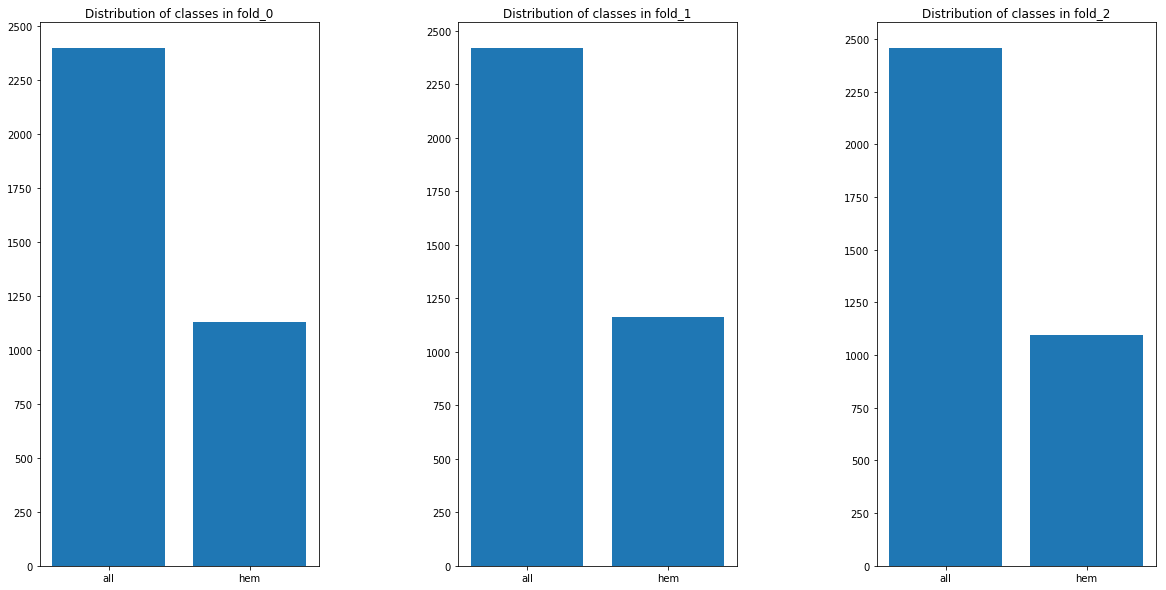

In [4]:
fig, ax = plt.subplots(1, 3, figsize=(20,10))
plt.subplots_adjust(wspace=0.5)
plt.setp(ax, yticks=np.arange(0, 2501, 250))
for i, key in enumerate(count_dict.keys()):
    ax[i].bar(count_dict[key].keys(), count_dict[key].values())
    ax[i].set_title('Distribution of classes in {}'.format(key))
    
    # Get the exact box coordinates of the Axes object
    extent = ax[i].get_window_extent().transformed(fig.dpi_scale_trans.inverted())
    
    # Save the subplot by padding the x-dimension by 25% and the y-dimension by 20%.
    plt.savefig('class_distribution_{}.pdf'.format(key), bbox_inches=extent.expanded(1.25, 1.2))

### Visualizing the cell number distribution across different folds

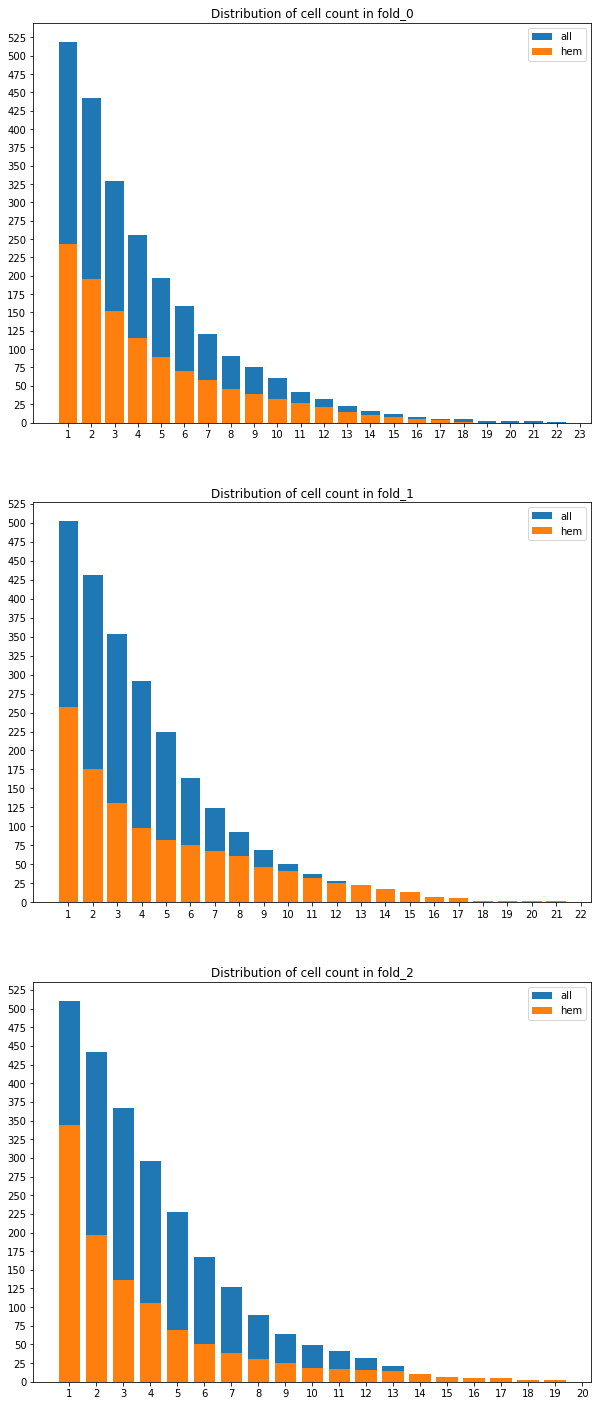

In [6]:
fig, ax = plt.subplots(3, 1, figsize=(10,25))
plt.setp(ax, 
         xticks=np.arange(1, 25, 1),
         yticks=np.arange(0, 526, 25)
        )
for i, key in enumerate(cell_counts.keys()):
    for k, v in cell_counts[key].items():
        ax[i].bar(v.keys(), v.values())
        ax[i].legend(list(cell_counts[key].keys()))
        ax[i].set_title("Distribution of cell count in {}".format(key))
        
        # Get the exact box coordinates of the Axes object
        extent = ax[i].get_window_extent().transformed(fig.dpi_scale_trans.inverted())
        
        # Save the subplot by padding the x-dimension by 25% and the y-dimension by 20%.
        plt.savefig('cell_count_distribution_{}.pdf'.format(key), bbox_inches=extent.expanded(1.25, 1.2))

### Visualizing the UID sample distribution across different folds

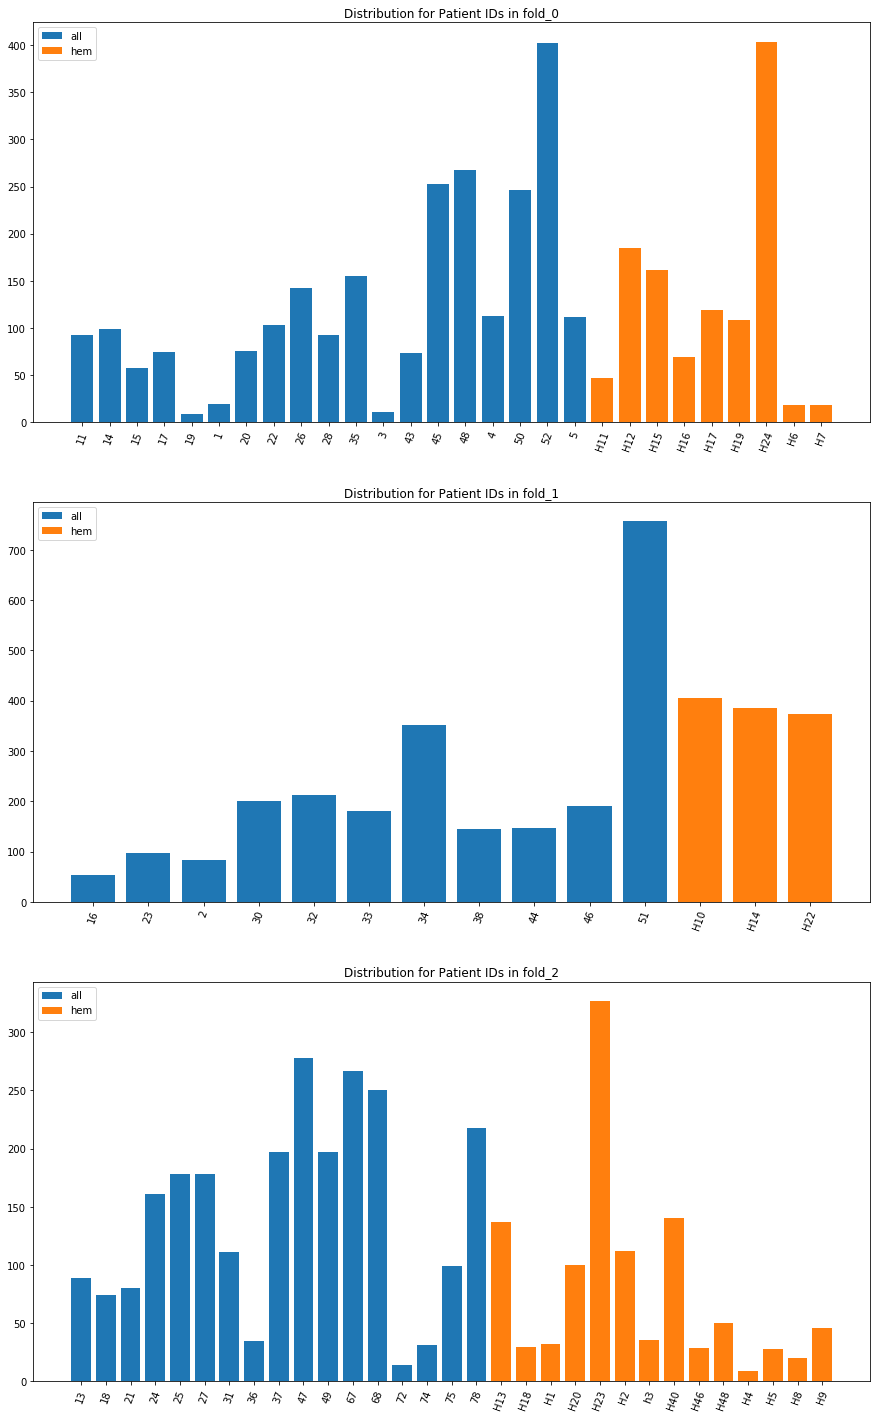

In [7]:
fig, ax = plt.subplots(3, 1, figsize=(15, 25))

for i, fold in enumerate(uid_dict.keys()):
    inner_dict = uid_dict[fold]
    for k, v in inner_dict.items():
        ax[i].bar(v.keys(), v.values())
        ax[i].legend(list(inner_dict.keys()), loc='upper left')
        ax[i].tick_params(axis='x', rotation=70)
        ax[i].set_title("Distribution for Patient IDs in {}".format(fold))
        
        # Get the exact box coordinates of the Axes object
        extent = ax[i].get_window_extent().transformed(fig.dpi_scale_trans.inverted())
        
        # Save the subplot by padding the x-dimension by 25% and the y-dimension by 20%.
        plt.savefig('uid_distribution_{}.pdf'.format(fold), bbox_inches=extent.expanded(1.25, 1.2))